In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/sample_submission.csv


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#

from scipy import stats
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p

#

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

#

import warnings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [55]:
# Loading datasets.

train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

In [56]:
print(train.shape, test.shape)

(1460, 81) (1459, 80)


In [57]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [58]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [59]:
# Dropping unnecessary Id column.

train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [60]:
# Backing up target variables and dropping them from train data.

y = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

## Analysis Time!


Observations:
1. There's strong relation between overall quality of the houses and their sale prices.
1. Again above grade living area seems strong indicator for sale price.
1. Garage features, number of baths and rooms, how old the building is etc. also having effect on the price on various levels too.
1. There are some obvious relations we gonna pass like total square feet affecting how many rooms there are or how many cars can fit into a garage vs. garage area etc.
1. Overall condition of the house seems less important on the pricing, it's interesting and worth digging.

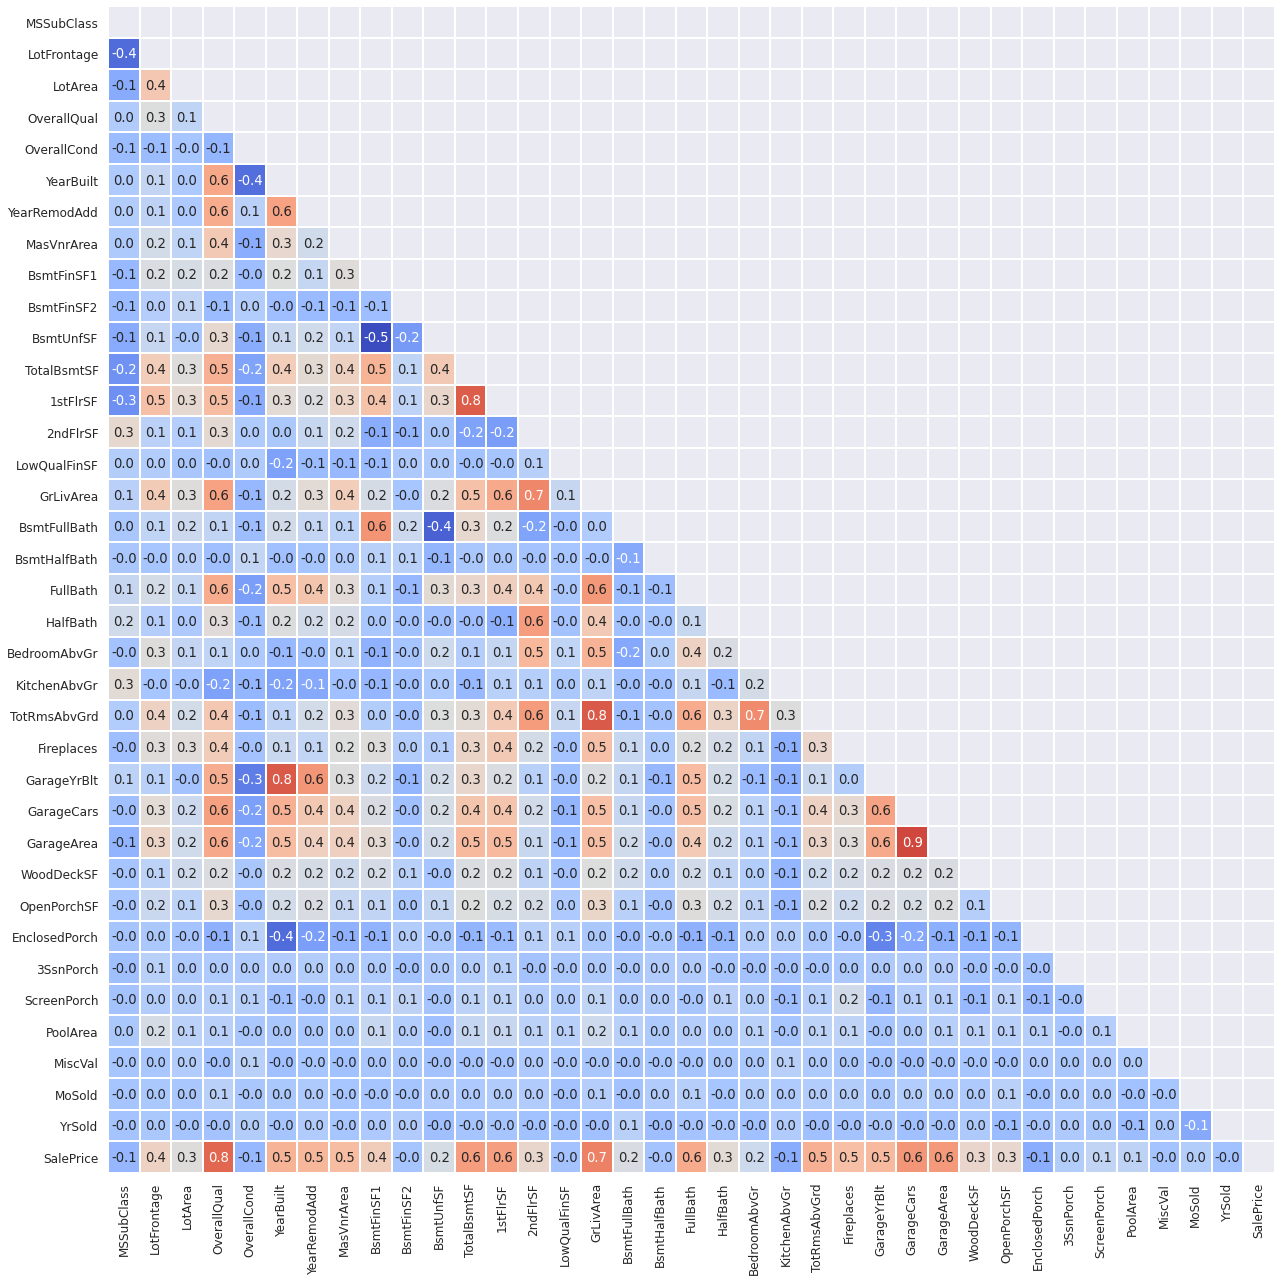

In [61]:
# Display numerical correlations (pearson) between features on heatmap.

sns.set(font_scale=1.1)
correlation_train = train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

In [62]:
# Merging train test features for engineering.

features = pd.concat([train_features, test_features]).reset_index(drop=True)
print(features.shape)

(2919, 79)


### Missing Data
Alright, first of all we need detect missing values, then wee need to get rid of them for the next steps of our work. So let's list our missing values and visualize them:


In [63]:

def missing_percentage(df):
    
    """A function for returning missing ratios."""
    
    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
               100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                     100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

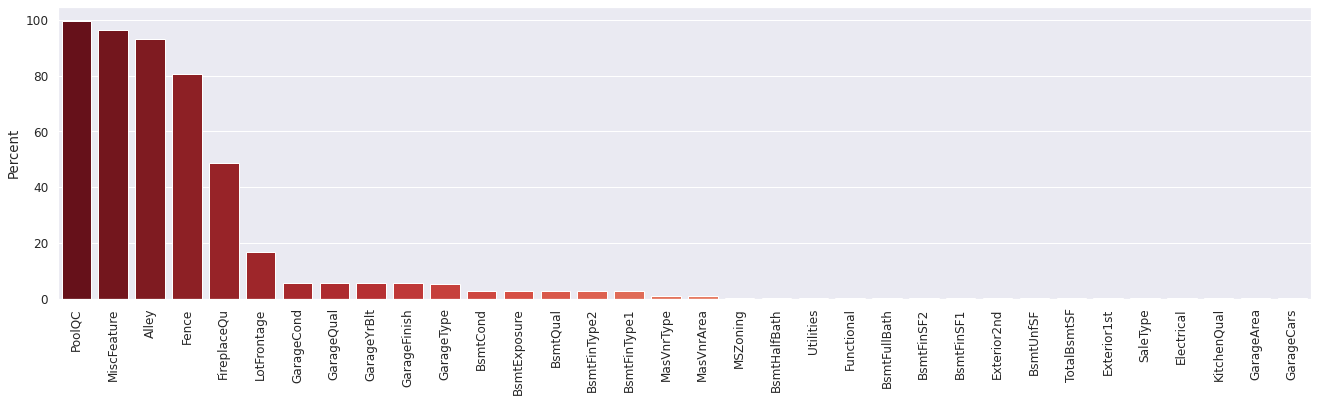

In [64]:
# Checking 'NaN' values.

missing = missing_percentage(features)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

Top 5 features where the most of missing values exist are PoolQC, MiscFeature, Alley, Fence and FireplaceQu.

### Fixing missing values

1. First we fill the NaN's in the columns where they mean 'None' so we gonna replace them with that,
1. Then we fill numerical columns where missing values indicating there is no parent feature to measure, so we replace them with 0's.
1. Even with these there are some actual missing data, by checking general trends of these features we can fill them with most frequent value(with mode).
1. MSZoning part is little bit tricky I choose to fill them with most common type of the related MSSubClass type. It's not perfect but at least we decrease randomness a little bit.
1. Again we fill the Lot Frontage with similar approach.


In [65]:
# List of 'NaN' including columns where NaN's mean none.

none_cols = [
    'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]

# List of 'NaN' including columns where NaN's mean 0.

zero_cols = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'
]

# List of 'NaN' including columns where NaN's actually missing gonna replaced with mode.

freq_cols = [
    'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
    'SaleType', 'Utilities'
]

# Filling the list of columns above with appropriate values:

for col in zero_cols:
    features[col].replace(np.nan, 0, inplace=True)

for col in none_cols:
    features[col].replace(np.nan, 'None', inplace=True)

for col in freq_cols:
    features[col].replace(np.nan, features[col].mode()[0], inplace=True)

In [66]:
# Filling 'MSZoning' according to MSSubClass.

features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].apply(
    lambda x: x.fillna(x.mode()[0]))

In [67]:
# Filling 'MSZoning' according to Neighborhood.

features['LotFrontage'] = features.groupby(
    ['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [68]:
# Features which numerical on data but should be treated as category:

features['MSSubClass'] = features['MSSubClass'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

#### Feature Engineering
Ok this is the part where we dig deeper into our completed dataset. There are no missing values so we're good to go! I'm going to start with grouping some values, these values are really rare and I'm thinking they do not add much, so if they appear less than 10 times in our observations they get into 'Other' group.

In [69]:
# Transforming rare values(less than 10) into one group.

others = [
    'Condition1', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'Heating', 'Electrical', 'Functional', 'SaleType'
]

for col in others:
    mask = features[col].isin(
        features[col].value_counts()[features[col].value_counts() < 10].index)
    features[col][mask] = 'Other'

In [70]:
def srt_box(y, df):
    
    '''A function for displaying categorical variables.'''
    
    fig, axes = plt.subplots(14, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['object']).columns, axes):

        sortd = df.groupby([i])[y].median().sort_values(ascending=False)
        sns.boxplot(x=i,
                    y=y,
                    data=df,
                    palette='plasma',
                    order=sortd.index,
                    ax=j)
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=18))

        plt.tight_layout()

### Categorical Data

#### Observations
1. MSZoing
    * Floating village houses (I assume they are some kind of special area that retired community resides, has the highest median value.
    * Residental low density houses comes second with the some outliers.
    * Residental high and low seems similar meanwhile commercial is the lowest.
    
1. LandContour; Hillside houses seems a little bit higher expensive than the rest meanwhile banked houses are the lowest.

1. Neighborhood;

    * Northridge Heights, Northridge and Timberland are top 3 expensive places for houses.
    * Somerset, Veenker, Crawford, Clear Creek, College Creek and Bloomington Heights seems above average.
    * Sawyer West has wide range for prices related to similar priced regions.
    * Old Town and Edwards has some outlier prices but they generally below average.
    * Briardale, Iowa DOT and Rail Road, Meadow Village are the cheapest places for houses it seems...
    
    
1. Conditions;

    * Meanwhile having wide range of values being close to North-South Railroad seems having positive effect on the price.
    * Being near or adjacent to positive off-site feature (park, greenbelt, etc.) increases the price.
        These values are pretty similar but we can get some useful information from them.
        
        
1. MasVnrType; Having stone masonry veneer seems better priced than having brick.

1. Quality Features; There are many categorical quality values that affects the pricing on some degree, we're going to quantify them so we can create new features based on them. So we don't dive deep on them in this part.


1. CentralAir; Having central air system has decent positive effect on sale prices.

1. GarageType;

    * Built-In (Garage part of house - typically has room above garage) garage typed houses are the most expensive ones.
    * Attached garage types following the built-in ones.
    * Car ports are the lowest
    
1. Misc; Sale type has some kind of effect on the prices but we won't get into details here. Btw... It seems having tennis court is really adding price to your house, who would have known :)


**Alright, we're done with categorical data inspecting, I'm going to convert some of these categories to numerical ones, especially the ones where related to quality of the specific features.**

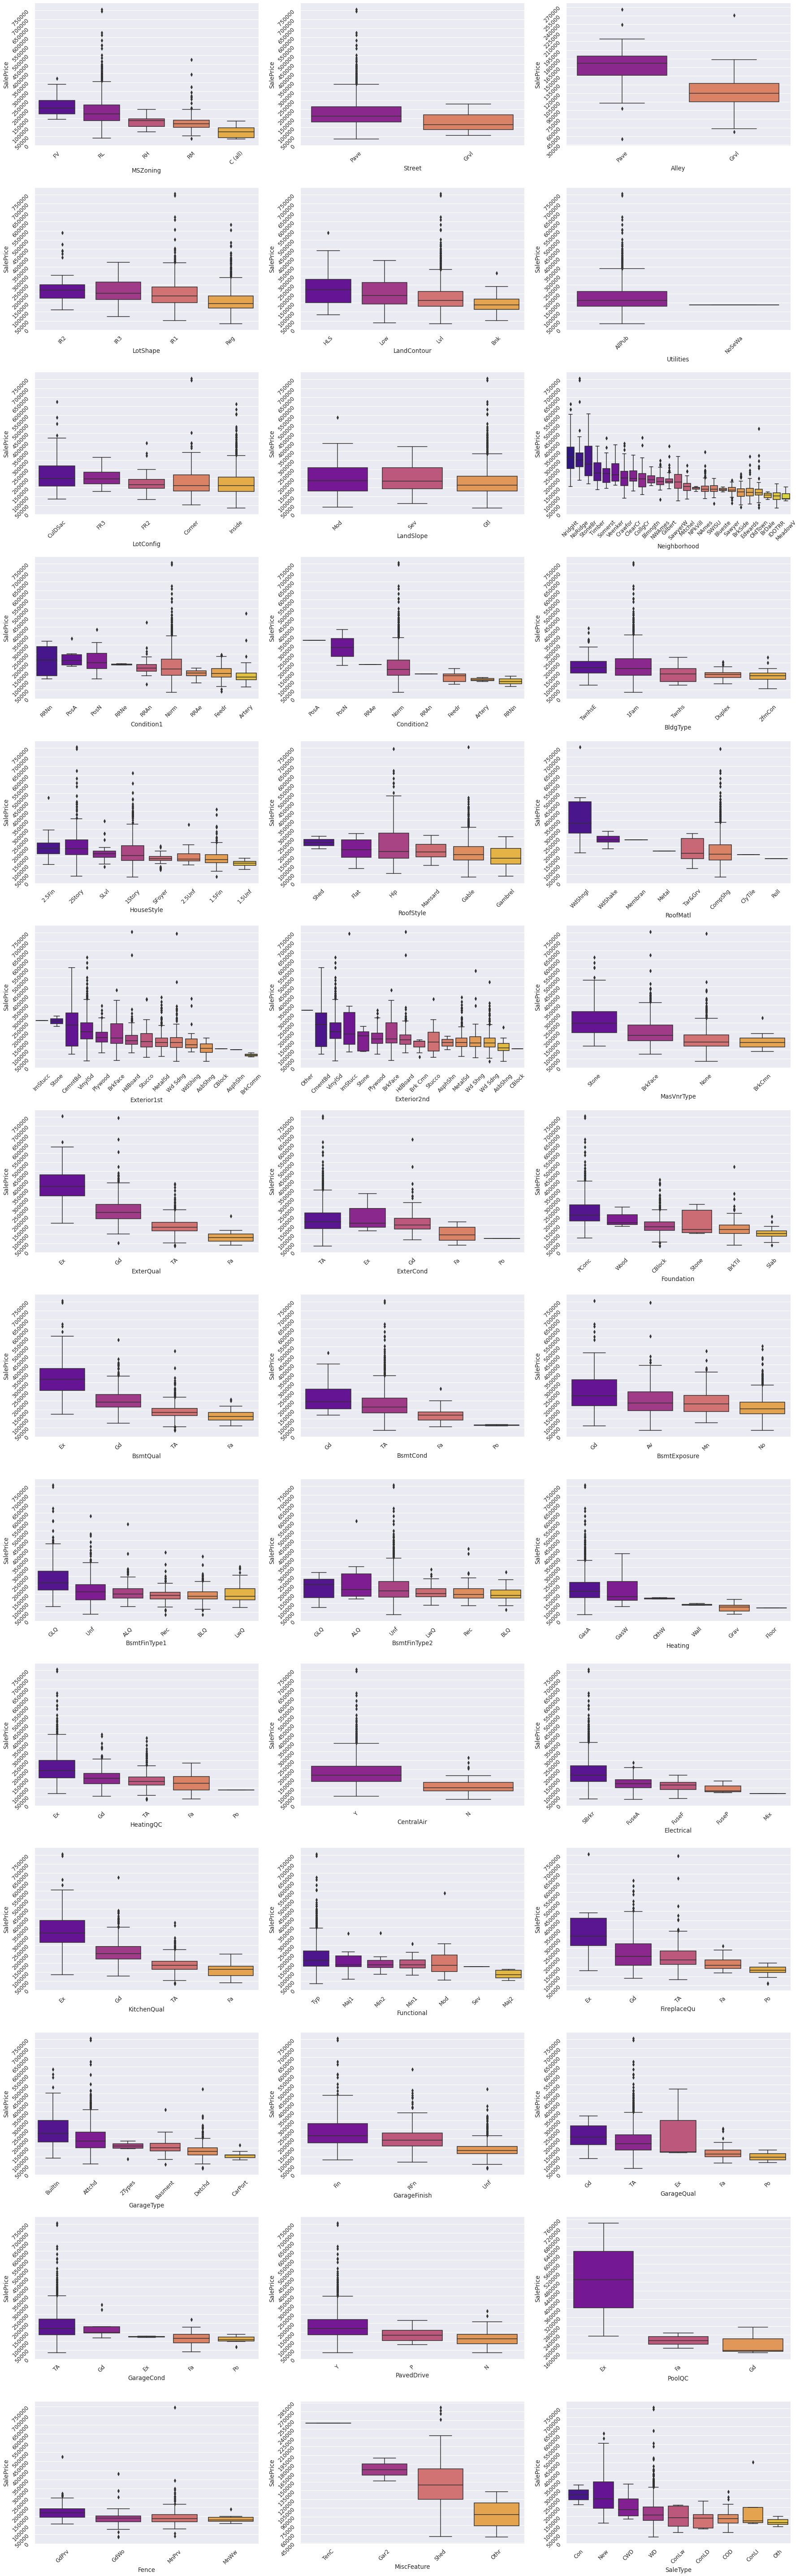

In [71]:
# Displaying sale prices vs. categorical values:

srt_box('SalePrice', train)

In [72]:
# Converting some of the categorical values to numeric ones. Choosing similar values for closer groups to balance linear relations...

neigh_map = {
    'MeadowV': 1,
    'IDOTRR': 1,
    'BrDale': 1,
    'BrkSide': 2,
    'OldTown': 2,
    'Edwards': 2,
    'Sawyer': 3,
    'Blueste': 3,
    'SWISU': 3,
    'NPkVill': 3,
    'NAmes': 3,
    'Mitchel': 4,
    'SawyerW': 5,
    'NWAmes': 5,
    'Gilbert': 5,
    'Blmngtn': 5,
    'CollgCr': 5,
    'ClearCr': 6,
    'Crawfor': 6,
    'Veenker': 7,
    'Somerst': 7,
    'Timber': 8,
    'StoneBr': 9,
    'NridgHt': 10,
    'NoRidge': 10
}

features['Neighborhood'] = features['Neighborhood'].map(neigh_map).astype(
    'int')
ext_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['ExterQual'] = features['ExterQual'].map(ext_map).astype('int')
features['ExterCond'] = features['ExterCond'].map(ext_map).astype('int')
bsm_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['BsmtQual'] = features['BsmtQual'].map(bsm_map).astype('int')
features['BsmtCond'] = features['BsmtCond'].map(bsm_map).astype('int')
bsmf_map = {
    'None': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}

features['BsmtFinType1'] = features['BsmtFinType1'].map(bsmf_map).astype('int')
features['BsmtFinType2'] = features['BsmtFinType2'].map(bsmf_map).astype('int')
heat_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['HeatingQC'] = features['HeatingQC'].map(heat_map).astype('int')
features['KitchenQual'] = features['KitchenQual'].map(heat_map).astype('int')
features['FireplaceQu'] = features['FireplaceQu'].map(bsm_map).astype('int')
features['GarageCond'] = features['GarageCond'].map(bsm_map).astype('int')
features['GarageQual'] = features['GarageQual'].map(bsm_map).astype('int')

### Numeric Data
There are many numeric features the inspect, one of the best ways to see how they effect sale prices is scatter plots.


* Observations:
* OverallQual; It's clearly visible that sale price of the house increases with overall quality. This confirms the correlation in first table we did at the beginning. (Pearson corr was 0.8)

* OverallCondition; Looks like overall condition is left skewed where most of the houses are around 5/10 condition. But it doesn't effect the price like quality indicator...

* YearBuilt; Again new buildings are generally expensive than the old ones.

* Basement; General table shows bigger basements are increasing the price but I see some outliers there...

* GrLivArea; This feature is pretty linear but we can spot two outliers effecting this trend. There are some huge area houses with pretty cheap prices, there might be some reason behind it but we better drop them.

* SaleDates; They seem pretty unimportant on sale prices, we can drop them...

In [73]:
# Plotting numerical features with polynomial order to detect outliers by eye.

def srt_reg(y, df):
    fig, axes = plt.subplots(12, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):

        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()


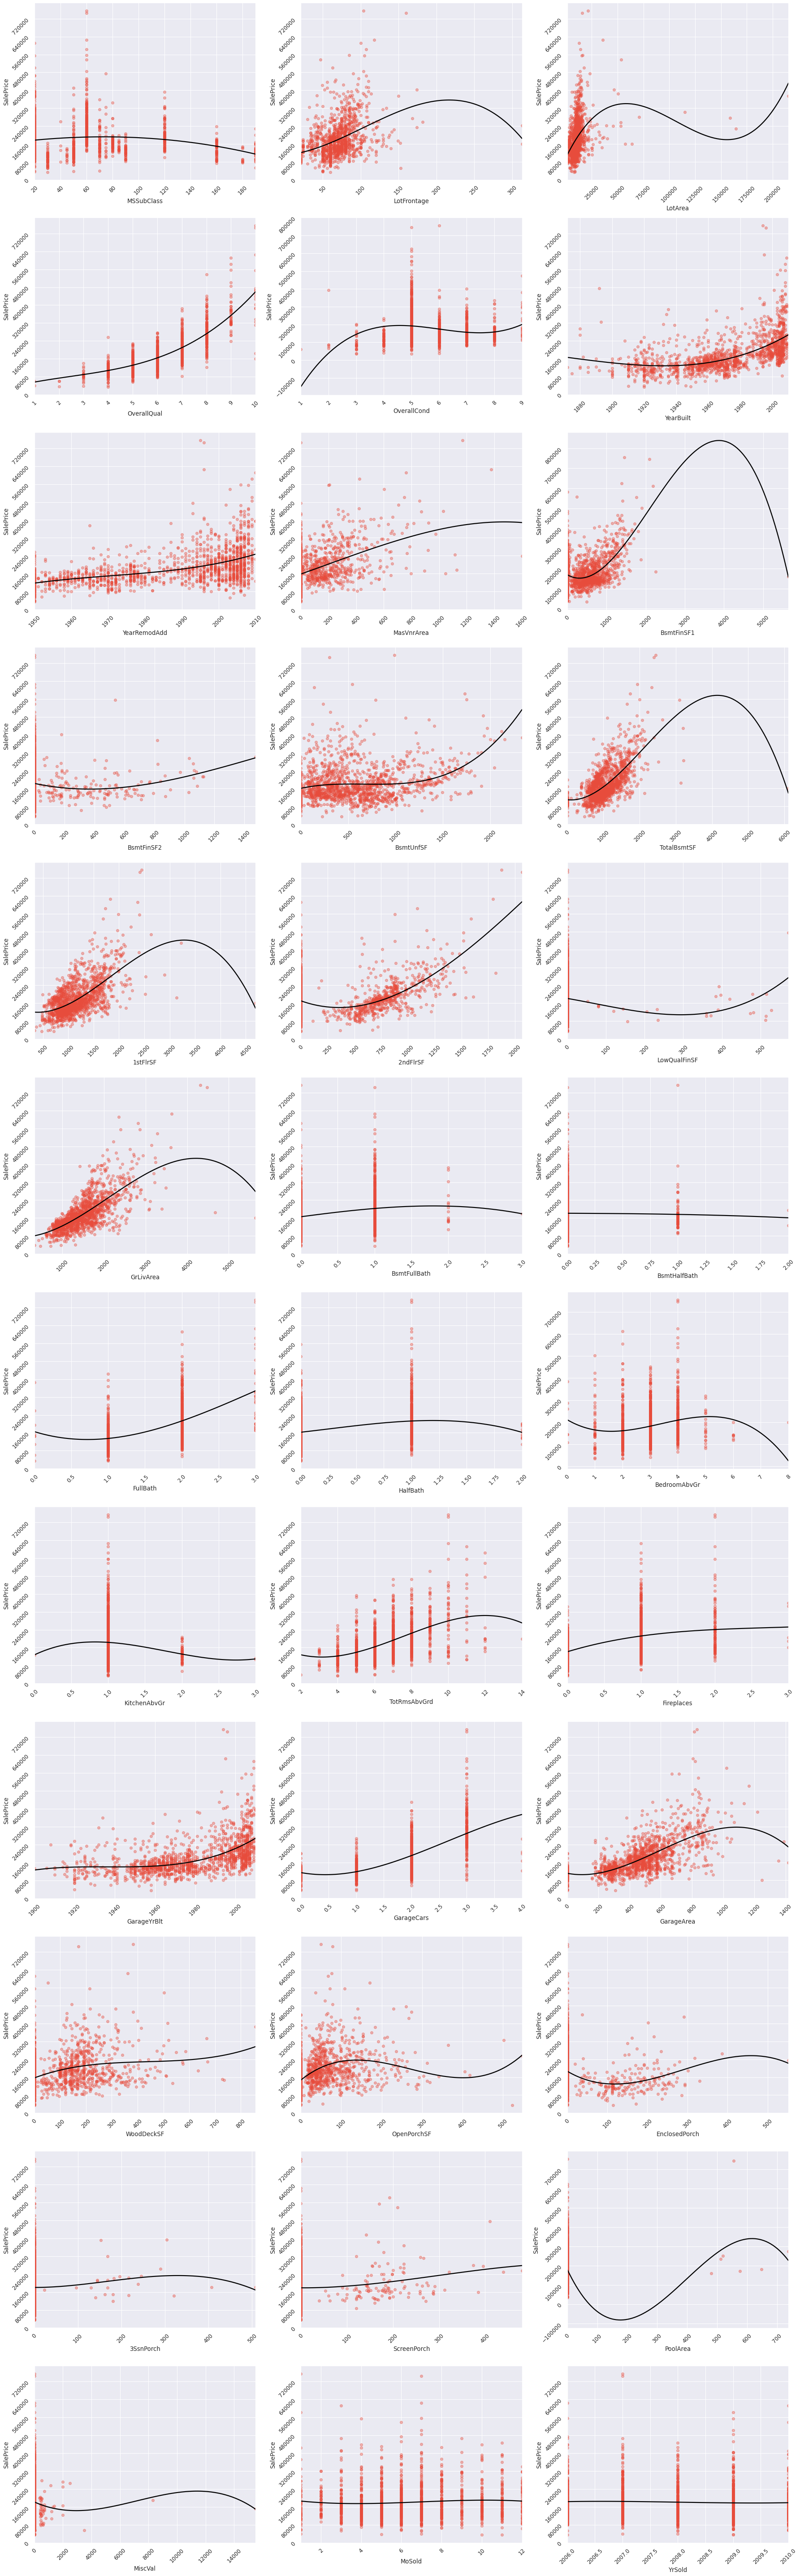

In [74]:
srt_reg('SalePrice', train)

#### Outliers
Ok here we're going to drop some outliers we detected them just above

In [75]:

features = features.join(y)
features = features.drop(features[(features['OverallQual'] < 5)
                                  & (features['SalePrice'] > 200000)].index)
features = features.drop(features[(features['GrLivArea'] > 4000)
                                  & (features['SalePrice'] < 200000)].index)
features = features.drop(features[(features['GarageArea'] > 1200)
                                  & (features['SalePrice'] < 200000)].index)
features = features.drop(features[(features['TotalBsmtSF'] > 3000)
                                  & (features['SalePrice'] > 320000)].index)
features = features.drop(features[(features['1stFlrSF'] < 3000)
                                  & (features['SalePrice'] > 600000)].index)
features = features.drop(features[(features['1stFlrSF'] > 3000)
                                  & (features['SalePrice'] < 200000)].index)

y = features['SalePrice']
y.dropna(inplace=True)
features.drop(columns='SalePrice', inplace=True)

### Creating New Features
With basic approach by merging some important indicators and making them stronger.

In [76]:
# Creating new features  based on previous observations. There might be some highly correlated features now. You cab drop them if you want to...

features['TotalSF'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                       features['1stFlrSF'] + features['2ndFlrSF'])
features['TotalBathrooms'] = (features['FullBath'] +
                              (0.5 * features['HalfBath']) +
                              features['BsmtFullBath'] +
                              (0.5 * features['BsmtHalfBath']))

features['TotalPorchSF'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                            features['EnclosedPorch'] +
                            features['ScreenPorch'] + features['WoodDeckSF'])

features['YearBlRm'] = (features['YearBuilt'] + features['YearRemodAdd'])

# Merging quality and conditions.

features['TotalExtQual'] = (features['ExterQual'] + features['ExterCond'])
features['TotalBsmQual'] = (features['BsmtQual'] + features['BsmtCond'] +
                            features['BsmtFinType1'] +
                            features['BsmtFinType2'])
features['TotalGrgQual'] = (features['GarageQual'] + features['GarageCond'])
features['TotalQual'] = features['OverallQual'] + features[
    'TotalExtQual'] + features['TotalBsmQual'] + features[
        'TotalGrgQual'] + features['KitchenQual'] + features['HeatingQC']

# Creating new features by using new quality indicators.

features['QualGr'] = features['TotalQual'] * features['GrLivArea']
features['QualBsm'] = features['TotalBsmQual'] * (features['BsmtFinSF1'] +
                                                  features['BsmtFinSF2'])
features['QualPorch'] = features['TotalExtQual'] * features['TotalPorchSF']
features['QualExt'] = features['TotalExtQual'] * features['MasVnrArea']
features['QualGrg'] = features['TotalGrgQual'] * features['GarageArea']
features['QlLivArea'] = (features['GrLivArea'] -
                         features['LowQualFinSF']) * (features['TotalQual'])
features['QualSFNg'] = features['QualGr'] * features['Neighborhood']

### Checking New Features


In [77]:
# Observing the effects of newly created features on sale price.

def srt_reg(feature):
    merged = features.join(y)
    fig, axes = plt.subplots(5, 3, figsize=(25, 40))
    axes = axes.flatten()

    new_features = [
        'TotalSF', 'TotalBathrooms', 'TotalPorchSF', 'YearBlRm',
        'TotalExtQual', 'TotalBsmQual', 'TotalGrgQual', 'TotalQual', 'QualGr',
        'QualBsm', 'QualPorch', 'QualExt', 'QualGrg', 'QlLivArea', 'QualSFNg'
    ]

    for i, j in zip(new_features, axes):

        sns.regplot(x=i,
                    y=feature,
                    data=merged,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()

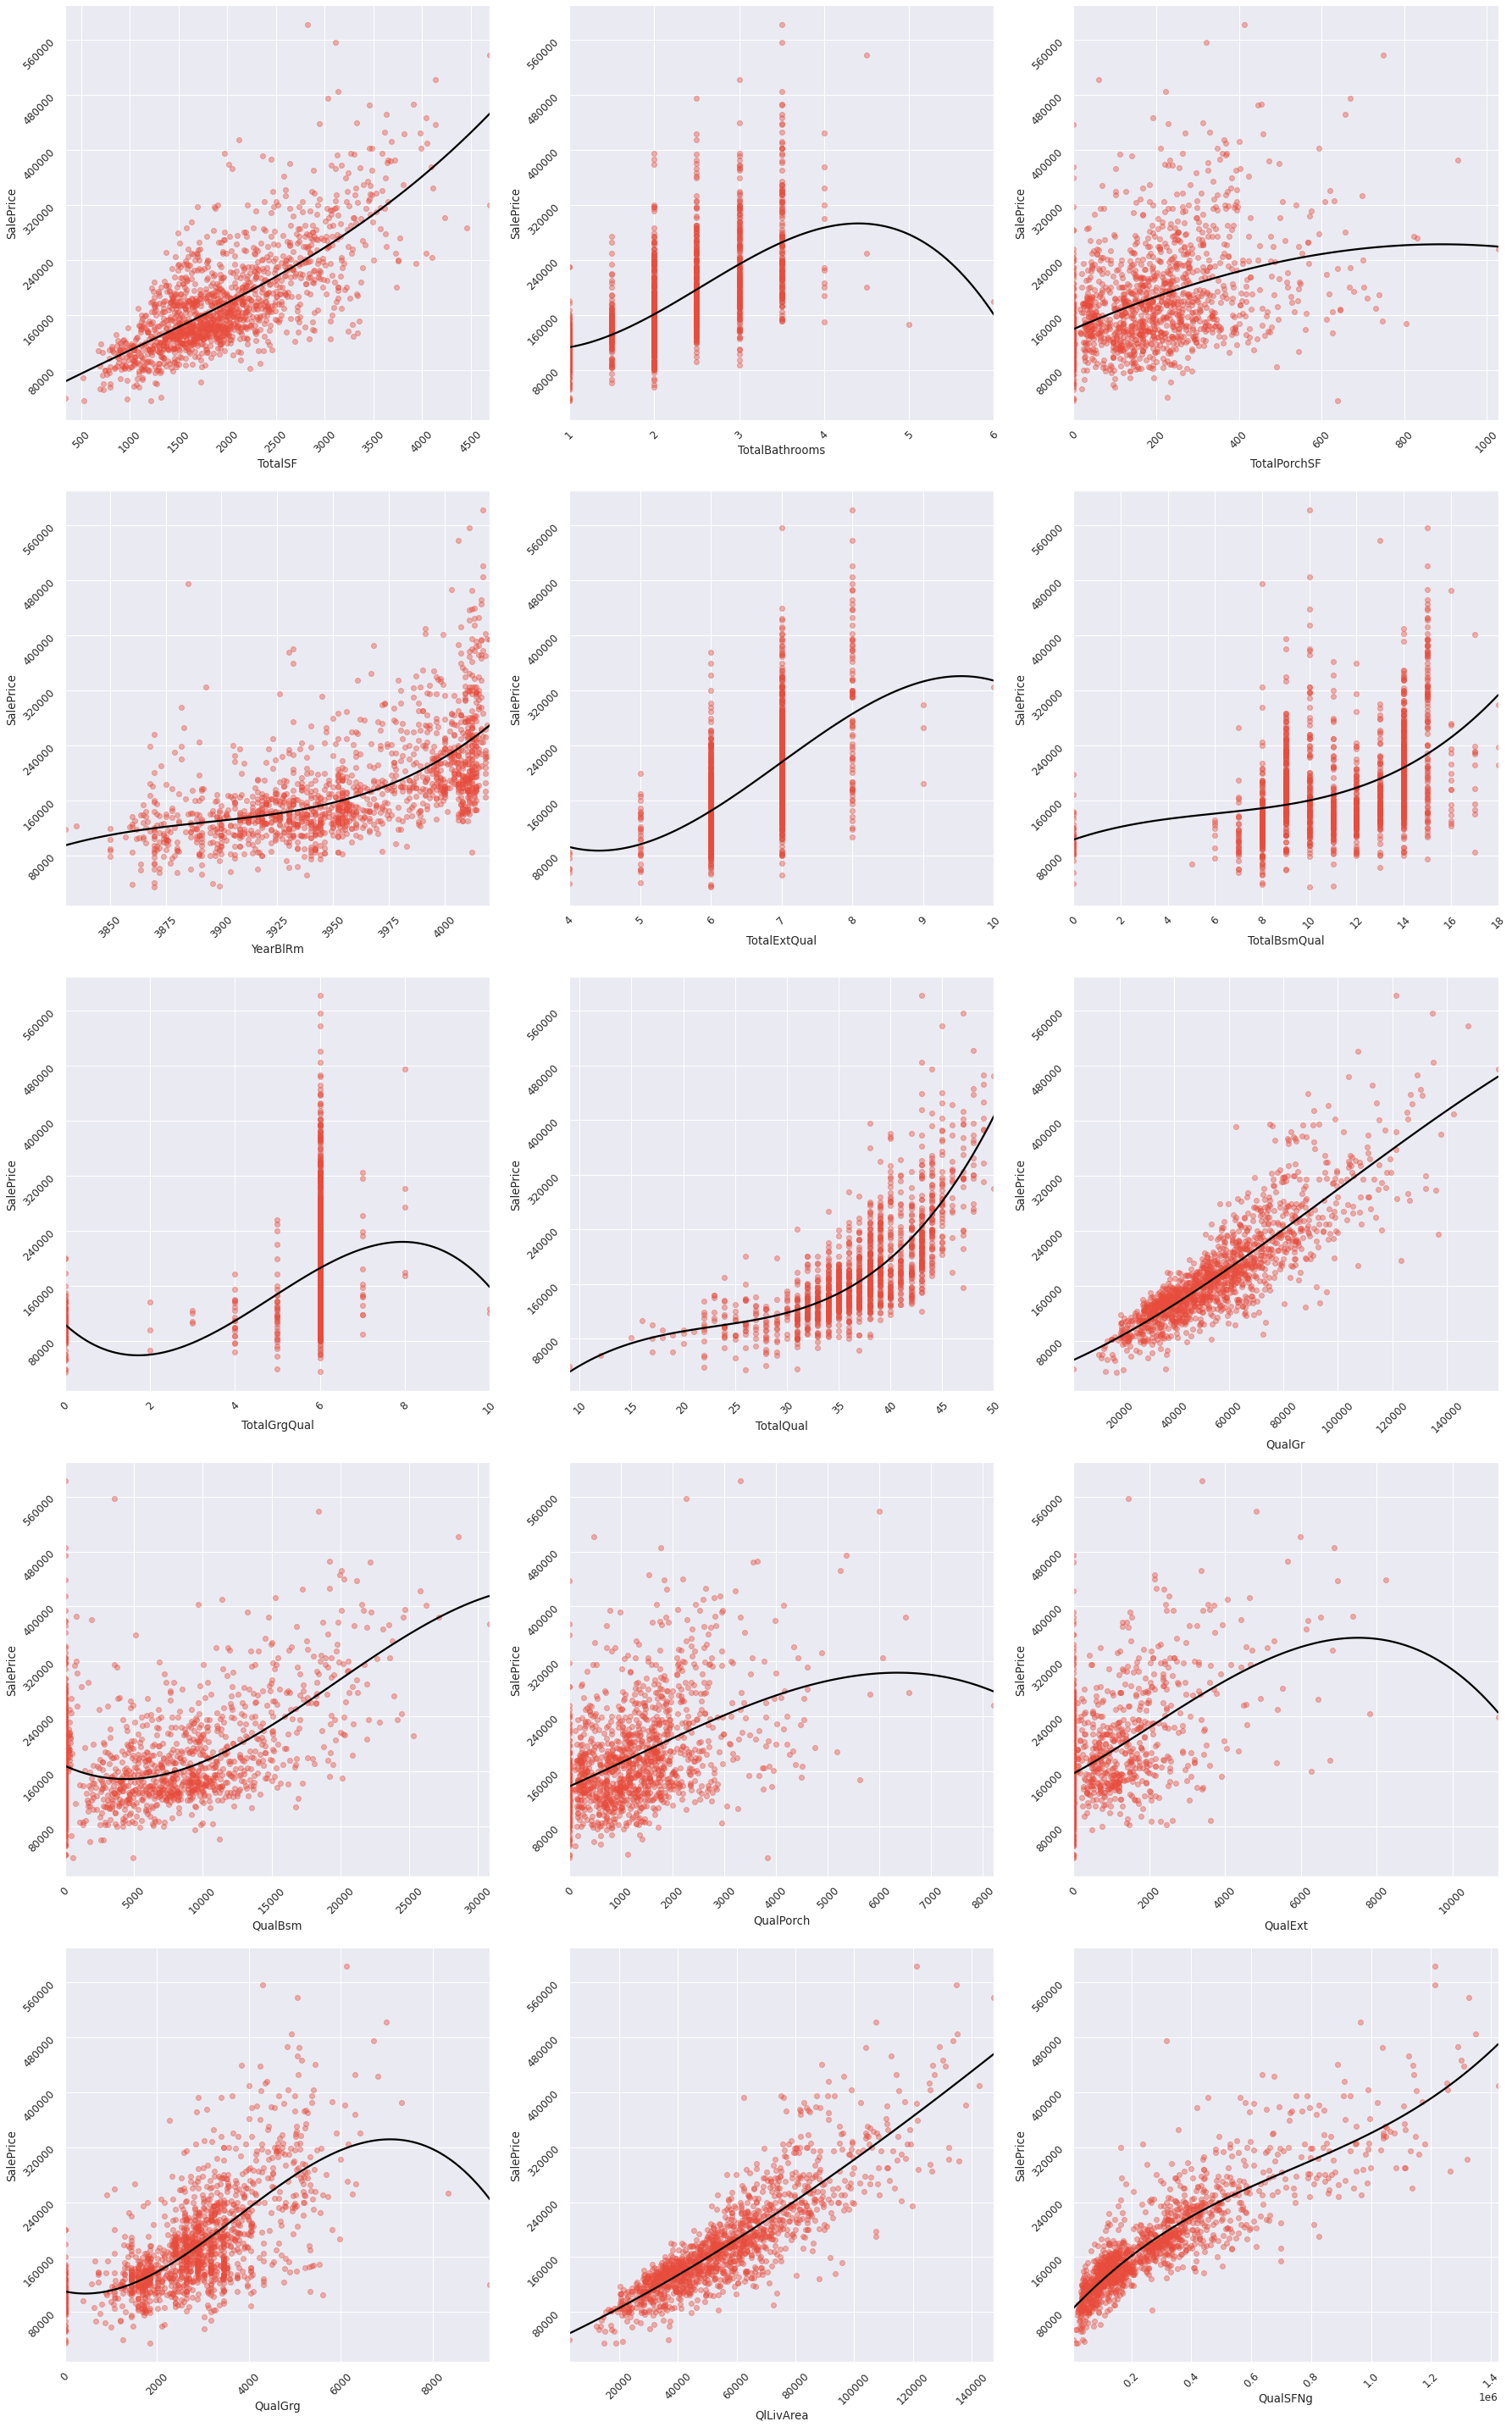

In [78]:
srt_reg('SalePrice')

In [79]:
# Creating some simple features.

features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x: 1
                                                     if x > 0 else 0)
features['HasGarage'] = features['QualGrg'].apply(lambda x: 1 if x > 0 else 0)
features['HasBsmt'] = features['QualBsm'].apply(lambda x: 1 if x > 0 else 0)
features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1
                                                        if x > 0 else 0)
features['HasPorch'] = features['QualPorch'].apply(lambda x: 1 if x > 0 else 0)

### Transforming the Data
Some of the continious values are not distributed evenly and not fitting on normal distribution, we can fix them by using couple transformation approaches. We're going to use boxcox here

In [80]:

skewed = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'LowQualFinSF', 'MiscVal'
]
# Finding skewness of the numerical features.

skew_features = np.abs(features[skewed].apply(lambda x: skew(x)).sort_values(
    ascending=False))

# Filtering skewed features.

high_skew = skew_features[skew_features > 0.3]

# Taking indexes of high skew.

skew_index = high_skew.index

# Applying boxcox transformation to fix skewness.

for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

### Droping feautures
Here we dropping some unnecessary features had their use in feature engineering or not needed at all

In [81]:
# Features to drop:

to_drop = [
    'Utilities',
    'PoolQC',
    'YrSold',
    'MoSold',
    'ExterQual',
    'BsmtQual',
    'GarageQual',
    'KitchenQual',
    'HeatingQC',
]

# Dropping features.

features.drop(columns=to_drop, inplace=True)

In [82]:
# Getting dummy variables for categorical data.

features = pd.get_dummies(data=features)

In [83]:
print(f'Number of missing values: {features.isna().sum().sum()}')

Number of missing values: 0


So we have no missing values

In [84]:

features.sample(5)

LotFrontage    LotArea  Neighborhood  OverallQual  OverallCond  \
2287    22.746364  14.880818            10            8            5   
1616     8.809474  10.886467             1            4            6   
273     20.976654  14.392028             3            6            6   
2200    18.033696  15.539537             6            6            6   
404     18.215066  14.570497             5            6            5   

      YearBuilt  YearRemodAdd  MasVnrArea  ExterCond  BsmtCond  BsmtFinType1  \
2287       2006          2007   24.233712          3         3             1   
1616       1972          1972    0.000000          3         3             3   
273        1958          1988   19.164709          3         3             3   
2200       1914          1995    0.000000          3         3             1   
404        1995          1996    0.000000          3         3             1   

      BsmtFinSF1  BsmtFinType2  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
2287    0.000000             1    0.000000  128.035515   848.826632  6.843671   
1616   78.415228             1    0.000000   41.214724   308.889037  5.875465   
273   133.992537             2   11.519806    0.000000   642.529120  6.812164   
2200    0.000000             1    0.000000   74.376637   373.812188  6.059898   
404     0.000000             1    0.000000   82.559571   437.391147  6.211168   

         2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2287     0.000000           0.0   9.467709           0.0           0.0   
1616   733.052364           0.0   8.778529           0.0           0.0   
273      0.000000           0.0   9.408438           1.0           0.0   
2200   792.642402           0.0   9.005990           0.0           0.0   
404   1047.633468           0.0   9.349036           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
2287         2         0             3             1             7   
1616         1         1             3             1             5   
273          2         0             3             1             6   
2200         1         0             3             1             6   
404          2         1             3             1             7   

      Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  GarageArea  \
2287           1            4       2006.0         3.0       856.0   
1616           0            0       1972.0         1.0       286.0   
273            1            4       1958.0         1.0       338.0   
2200           0            0       1994.0         2.0       400.0   
404            1            3       1995.0         2.0       373.0   

      GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
2287           3    0.000000     16.47918       0.000000        0.0   
1616           3    0.000000      0.00000       8.899156        0.0   
273            3   54.835534      0.00000       0.000000        0.0   
2200           3   70.189263      0.00000       0.000000        0.0   
404            3    0.000000      9.61823       0.000000        0.0   

      ScreenPorch  PoolArea   MiscVal  TotalSF  TotalBathrooms  TotalPorchSF  \
2287          0.0       0.0  0.000000   1694.0             2.0           112   
1616          0.0       0.0  0.000000   1386.0             1.5            64   
273           0.0       0.0  0.000000   2872.0             3.0           289   
2200          0.0       0.0  6.290595   1264.0             1.0           424   
404           0.0       0.0  0.000000   1572.0             2.5            40   

      YearBlRm  TotalExtQual  TotalBsmQual  TotalGrgQual  TotalQual  QualGr  \
2287      4013             7            10             6         40   67760   
1616      3944             6            10             6         32   34944   
273       3946             6            11             6         36   58752   
2200      3909             6             9             6         35   44240   
404       3991 

In [85]:
features.describe()

LotFrontage      LotArea  Neighborhood  OverallQual  OverallCond  \
count  2908.000000  2908.000000   2908.000000  2908.000000  2908.000000   
mean     18.932145    14.236977      4.455640     6.081843     5.566713   
std       3.698922     1.155737      2.457431     1.397639     1.114074   
min       8.809474    10.151043      1.000000     1.000000     1.000000   
25%      17.482490    13.809915      3.000000     5.000000     5.000000   
50%      19.280172    14.351059      4.000000     6.000000     5.000000   
75%      20.976654    14.815542      5.000000     7.000000     6.000000   
max      48.749466    22.753413     10.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea    ExterCond     BsmtCond  \
count  2908.000000   2908.000000  2908.000000  2908.000000  2908.000000   
mean   1971.252751   1984.227992     8.183116     3.085282     2.918157   
std      30.296319     20.899483    11.176757     0.372262     0.576014   
min    1872.000000   1950.000000     0.000000     1.000000     0.000000   
25%    1953.000000   1965.000000     0.000000     3.000000     3.000000   
50%    1973.000000   1993.000000     0.000000     3.000000     3.000000   
75%    2001.000000   2004.000000    18.086738     3.000000     3.000000   
max    2010.000000   2010.000000    51.503143     5.000000     4.000000   

       BsmtFinType1   BsmtFinSF1  BsmtFinType2   BsmtFinSF2    BsmtUnfSF  \
count   2908.000000  2908.000000   2908.000000  2908.000000  2908.000000   
mean       3.535420    89.404287      1.273384     1.158782    60.314323   
std        2.113347    79.132819      0.954352     3.241698    32.850282   
min        0.000000     0.000000      0.000000     0.000000     0.000000   
25%        1.000000     0.000000      1.000000     0.000000    37.968112   
50%        4.000000    92.161724      1.000000     0.000000    59.674863   
75%        6.000000   150.796221      1.000000     0.000000    82.392453   
max        6.000000   507.637610      6.000000    14.352604   154.678888   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  2908.000000  2908.000000  2908.000000   2908.000000  2908.000000   
mean    546.849792     6.474135   460.160985      0.062741     9.193285   
std     201.641617     0.272500   590.189553      0.534211     0.505437   
min       0.000000     5.447958     0.000000      0.000000     7.012553   
25%     430.479389     6.282594     0.000000      0.000000     8.824656   
50%     524.586609     6.462368     0.000000      0.000000     9.212682   
75%     669.403320     6.671499   958.401261      0.000000     9.510842   
max    2267.208396     7.762517  2673.777280      5.405398    11.282376   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   2908.000000   2908.000000  2908.000000  2908.000000   2908.000000   
mean       0.427785      0.061210     1.565681     0.379642      2.859697   
std        0.523883      0.245429     0.550340     0.502787      0.822532   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     4.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  FireplaceQu  GarageYrBlt  \
count   2908.000000   2908.000000  2908.000000  2908.000000  2908.000000   
mean       1.044704      6.440509     0.593535     1.761692  1869.897180   
std        0.214850      1.557377     0.642910     1.805455   450.471016   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        1.000000      5.000000     0.000000     0.000000  1957.000000   
50%        1.000000      6.000000     1.000000     1.000000  1977.000000   
75%        1.000000      7.000000     1.000000     4.000000  2001.00

Separating train and test data


In [86]:
# Separating train and test set.

train = features.iloc[:len(y), :]
test = features.iloc[len(train):, :]

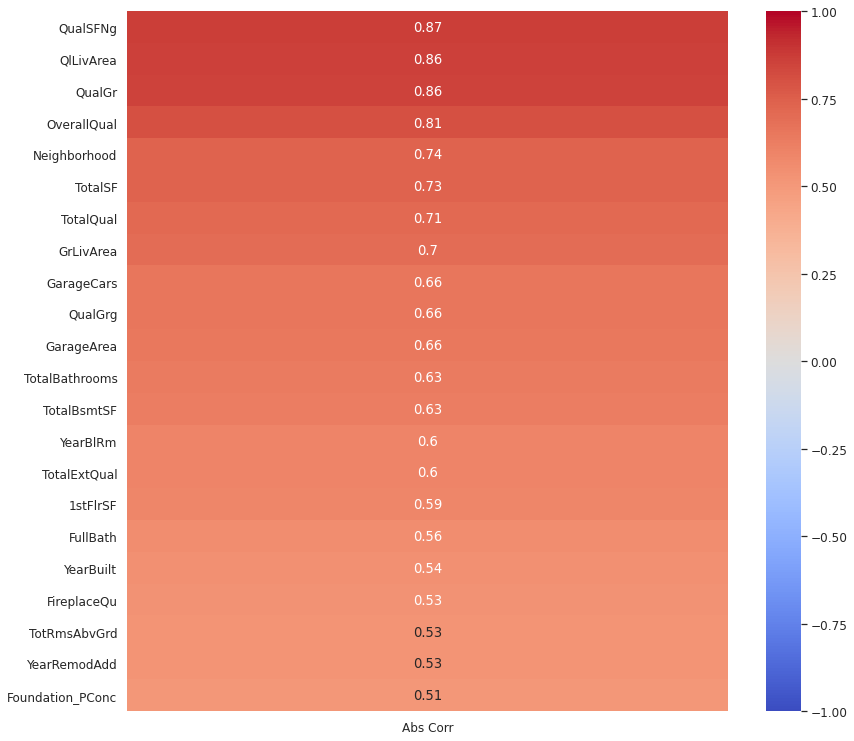

In [87]:
correlations = train.join(y).corrwith(train.join(y)['SalePrice']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.5], cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [88]:
def plot_dist3(df, feature, title):
    
    # Creating a customized chart. and giving in figsize and everything.
    
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    
    # creating a grid of 3 cols and 3 rows.
    
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    
    ax1 = fig.add_subplot(grid[0, :2])
    
    # Set the title.
    
    ax1.set_title('Histogram')
    
    # plot the histogram.
    
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 fit=norm,
                 ax=ax1,
                 color='#e74c3c')
    ax1.legend(labels=['Normal', 'Actual'])

    # customizing the QQ_plot.
    
    ax2 = fig.add_subplot(grid[1, :2])
    
    # Set the title.
    
    ax2.set_title('Probability Plot')
    
    # Plotting the QQ_Plot.
    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                   plot=ax2)
    ax2.get_lines()[0].set_markerfacecolor('#e74c3c')
    ax2.get_lines()[0].set_markersize(12.0)

    # Customizing the Box Plot:
    
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    
    ax3.set_title('Box Plot')
    
    # Plotting the box plot.
    
    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.suptitle(f'{title}', fontsize=24)

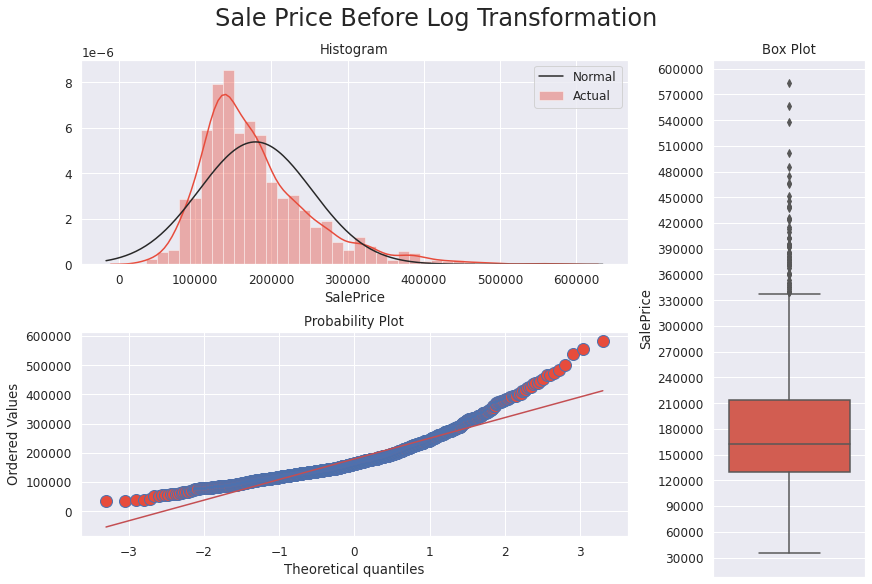

In [89]:
# Checking target variable.

plot_dist3(train.join(y), 'SalePrice', 'Sale Price Before Log Transformation')

In [90]:
# Setting model data.

X = train
X_test = test
y = np.log1p(y)

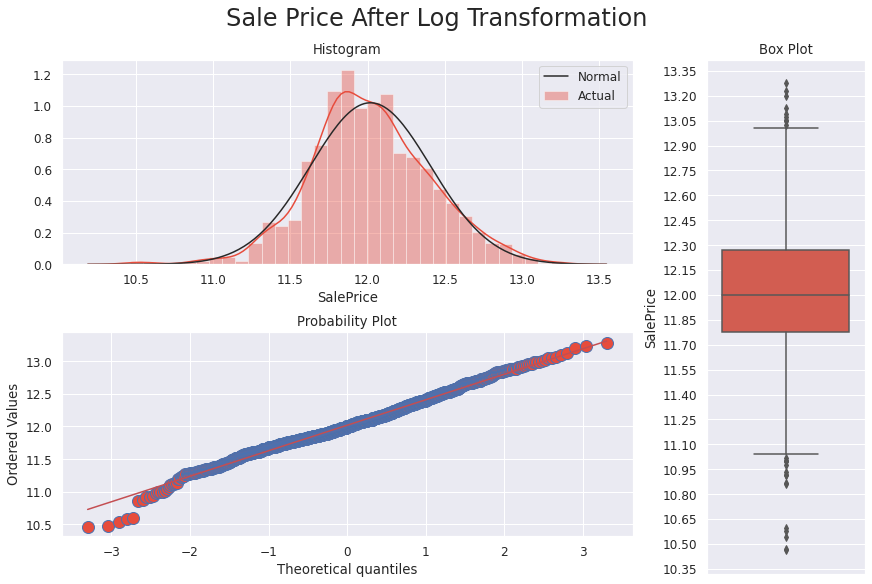

In [91]:
plot_dist3(train.join(y), 'SalePrice', 'Sale Price After Log Transformation')

# Modelling
* Ridge,
* Lasso,
* Elasticnet,
* Support Vector Regression (robust scaler on these before we run them because they really get effected by outliers.
* Gradient Boosting Regressor
* LightGBM Regressor
* XGBoost Regressor
* Hist Gradient Boosting Regressor
* Tweedie Regressor: It's generalized linear model with a Tweedie distribution. We gonna use power of 0 because we expecting normal target distribution but you can try this or other generalized models like poisson regressor or gamma regressor.

In [92]:
# Loading neccesary packages for modelling.

from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, TweedieRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor # This is for stacking part, works well with sklearn and others...

In [93]:
# Setting kfold for future use.

kf = KFold(10, random_state=42)
# Some parameters for ridge, lasso and elasticnet.

alphas_alt = [15.5, 15.6, 15.7, 15.8, 15.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [
    5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008
]
e_alphas = [
    0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007
]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

# ridge_cv

ridge = make_pipeline(RobustScaler(), RidgeCV(
    alphas=alphas_alt,
    cv=kf,
))

# lasso_cv:

lasso = make_pipeline(
    RobustScaler(),
    LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kf))

# elasticnet_cv:

elasticnet = make_pipeline(
    RobustScaler(),
    ElasticNetCV(max_iter=1e7,
                 alphas=e_alphas,
                 cv=kf,
                 random_state=42,
                 l1_ratio=e_l1ratio))

# svr:

svr = make_pipeline(RobustScaler(),
                    SVR(C=21, epsilon=0.0099, gamma=0.00017, tol=0.000121))

# gradientboosting:

gbr = GradientBoostingRegressor(n_estimators=2900,
                                learning_rate=0.0161,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=17,
                                loss='huber',
                                random_state=42)

# lightgbm:

lightgbm = LGBMRegressor(objective='regression',
                         n_estimators=3500,
                         num_leaves=5,
                         learning_rate=0.00721,
                         max_bin=163,
                         bagging_fraction=0.35711,
                         n_jobs=-1,
                         bagging_seed=42,
                         feature_fraction_seed=42,
                         bagging_freq=7,
                         feature_fraction=0.1294,
                         min_data_in_leaf=8)

# xgboost:

xgboost = XGBRegressor(
    learning_rate=0.0139,
    n_estimators=4500,
    max_depth=4,
    min_child_weight=0,
    subsample=0.7968,
    colsample_bytree=0.4064,
    nthread=-1,
    scale_pos_weight=2,
    seed=42,
)


# hist gradient boosting regressor:

hgrd= HistGradientBoostingRegressor(    loss= 'least_squares',
    max_depth= 2,
    min_samples_leaf= 40,
    max_leaf_nodes= 29,
    learning_rate= 0.15,
    max_iter= 225,
                                    random_state=42)

# tweedie regressor:
 
tweed = make_pipeline(RobustScaler(),TweedieRegressor(alpha=0.005))


# stacking regressor:

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr,
                                            xgboost, lightgbm,hgrd, tweed),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

# Cross Validation

In [94]:
def model_check(X, y, estimators, cv):
    
    ''' A function for testing multiple estimators.'''
    
    model_table = pd.DataFrame()

    row_index = 0
    for est, label in zip(estimators, labels):

        MLA_name = label
        model_table.loc[row_index, 'Model Name'] = MLA_name

        cv_results = cross_validate(est,
                                    X,
                                    y,
                                    cv=cv,
                                    scoring='neg_root_mean_squared_error',
                                    return_train_score=True,
                                    n_jobs=-1)

        model_table.loc[row_index, 'Train RMSE'] = -cv_results[
            'train_score'].mean()
        model_table.loc[row_index, 'Test RMSE'] = -cv_results[
            'test_score'].mean()
        model_table.loc[row_index, 'Test Std'] = cv_results['test_score'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1

    model_table.sort_values(by=['Test RMSE'],
                            ascending=True,
                            inplace=True)

    return model_table

In [95]:
# Setting list of estimators and labels for them:

estimators = [ridge, lasso, elasticnet, gbr, xgboost, lightgbm, svr, hgrd, tweed]
labels = [
    'Ridge', 'Lasso', 'Elasticnet', 'GradientBoostingRegressor',
    'XGBRegressor', 'LGBMRegressor', 'SVR', 'HistGradientBoostingRegressor','TweedieRegressor'
]

In [96]:
# Executing cross validation.

raw_models = model_check(X, y, estimators, kf)
display(raw_models.style.background_gradient(cmap='summer_r'))

### Stacking & Blending
Here we fit every single estimator we have on the train data and then blend them by assigning weights to each model and sum the results.

In [98]:
# Fitting the models on train data.

print('=' * 20, 'START Fitting', '=' * 20)
print('=' * 55)

print(datetime.now(), 'StackingCVRegressor')
stack_gen_model = stack_gen.fit(X.values, y.values)
print(datetime.now(), 'Elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)
print(datetime.now(), 'Lasso')
lasso_model_full_data = lasso.fit(X, y)
print(datetime.now(), 'Ridge')
ridge_model_full_data = ridge.fit(X, y)
print(datetime.now(), 'SVR')
svr_model_full_data = svr.fit(X, y)
print(datetime.now(), 'GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)
print(datetime.now(), 'XGboost')
xgb_model_full_data = xgboost.fit(X, y)
print(datetime.now(), 'Lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)
print(datetime.now(), 'Hist')
hist_full_data = hgrd.fit(X, y)
print(datetime.now(), 'Tweed')
tweed_full_data = tweed.fit(X, y)
print('=' * 20, 'FINISHED Fitting', '=' * 20)
print('=' * 58)

==================== START Fitting ====================
2020-10-26 04:39:11.380212 StackingCVRegressor
2020-10-26 04:44:44.679270 Elasticnet
2020-10-26 04:44:47.825490 Lasso
2020-10-26 04:44:48.700524 Ridge
2020-10-26 04:44:49.688869 SVR
2020-10-26 04:44:50.699896 GradientBoosting
2020-10-26 04:45:04.567009 XGboost
2020-10-26 04:45:38.861755 Lightgbm
2020-10-26 04:45:40.172003 Hist
2020-10-26 04:45:40.887510 Tweed
==================== FINISHED Fitting ====================


In [100]:
# Blending models by assigning weights:

def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) +
            (0.1 * lasso_model_full_data.predict(X)) +
            (0.1 * ridge_model_full_data.predict(X)) +
            (0.1 * svr_model_full_data.predict(X)) +
            (0.025 * gbr_model_full_data.predict(X)) +
            (0.15 * xgb_model_full_data.predict(X)) +
            (0.05 * lgb_model_full_data.predict(X)) +
            (0.025 * hist_full_data.predict(X)) +
            (0.1 * tweed_full_data.predict(X)) +
            (0.25 * stack_gen_model.predict(X.values)))

### Submission
Our models are tuned, stacked, fitted and blended so we are ready to predict and submit our results. One last thing that I have seen on couple examples adding weights on some quantile levels. 

In [101]:
submission = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
# Inversing and flooring log scaled sale price predictions
submission['SalePrice'] = np.floor(np.expm1(blend_models_predict(X_test)))
# Defining outlier quartile ranges
q1 = submission['SalePrice'].quantile(0.0050)
q2 = submission['SalePrice'].quantile(0.99)

# Applying weights to outlier ranges to smooth them
submission['SalePrice'] = submission['SalePrice'].apply(
    lambda x: x if x > q1 else x * 0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x
                                                        if x < q2 else x * 1.1)
submission = submission[['Id', 'SalePrice']]

In [102]:
# Saving submission file

submission.to_csv('mysubmission.csv', index=False)
print(
    'Save submission',
    datetime.now(),
)
submission.head()

Save submission 2020-10-26 04:58:03.771089


Id  SalePrice
0  1461   118521.0
1  1462   158933.0
2  1463   187950.0
3  1464   197147.0
4  1465   187683.0